Wine-Quality Dataset Analysis

#### **0-Data Okuma ve İnceleme**

In [ ]:
!pip install -U som-learn

     |████████████████████████████████| 6.2MB 4.0MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5-cp36-cp36m-linux_x86_64.whl size=420980 sha256=6d7b6384ecaaf2a78aea9c6b8eb8565f4c6af66e91d0ca75e53f3f6304a19417
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pandas import DataFrame
from sklearn.cluster import DBSCAN
from somlearn import SOM
from matplotlib.ticker import StrMethodFormatter
from matplotlib import ticker

In [ ]:
wine_white = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

wine_red = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=";")

wine_white_without_quality = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

wine_red_without_quality = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=";")


wine_red_without_quality.drop(["quality"], axis = 1, inplace = True) 
wine_white_without_quality.drop(["quality"], axis = 1, inplace = True) 

frames = [wine_red, wine_white]
wine = pd.concat(frames)

frames_without_quality = [wine_red_without_quality, wine_white_without_quality]
wine_without_quality = pd.concat(frames_without_quality)


In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
wine.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

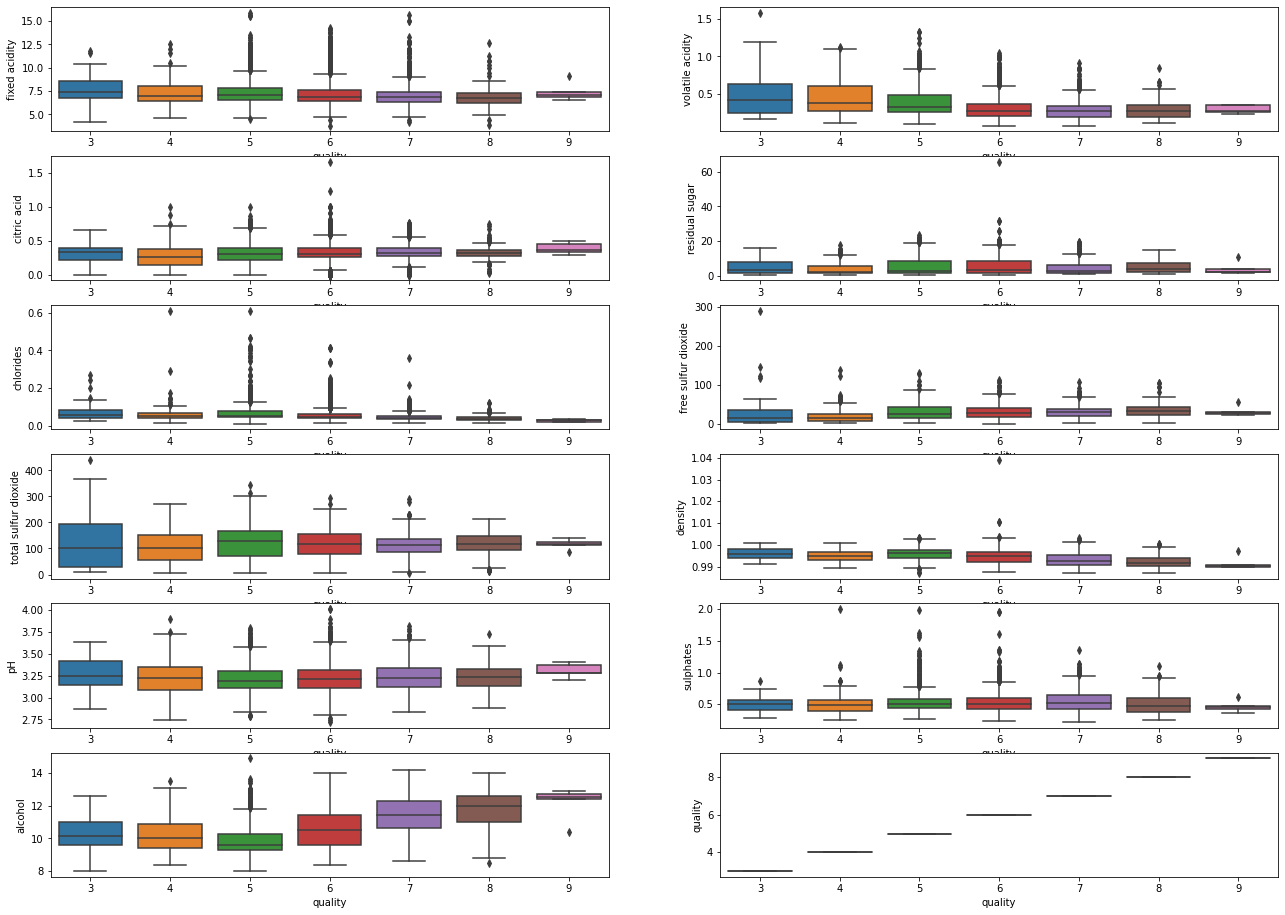

In [ ]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

draw_multivarient_plot(wine,6,2,"box")


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 819.9 KB


In [ ]:
for col in wine.columns.values:
  print("number of unique values of {}:{}".format(col, wine[col].nunique()))

number of unique values of fixed acidity:106
number of unique values of volatile acidity:187
number of unique values of citric acid:89
number of unique values of residual sugar:316
number of unique values of chlorides:214
number of unique values of free sulfur dioxide:135
number of unique values of total sulfur dioxide:276
number of unique values of density:998
number of unique values of pH:108
number of unique values of sulphates:111
number of unique values of alcohol:111
number of unique values of quality:7


####     **1-	Her özniteliğin dağılımını boxplot ile çizerek yorumlalım.**

In [ ]:
def get_summary_statistics(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    
wine_white_dist = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

wine_red_dist = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=";")


wine_red_dist['spec']='red'
wine_white_dist['spec']='white'

frames = [wine_red_dist,wine_white_dist]
wine_dist = pd.concat(frames)

In [ ]:
get_summary_statistics(wine_white_dist['alcohol'])

Min: 8.0
Mean: 10.51
Max: 14.2
25th percentile: 9.5
Median: 10.4
75th percentile: 11.4
Interquartile range (IQR): 1.9


In [ ]:
get_summary_statistics(wine_red_dist['alcohol'])

Min: 8.4
Mean: 10.42
Max: 14.9
25th percentile: 9.5
Median: 10.2
75th percentile: 11.1
Interquartile range (IQR): 1.6


In [ ]:
get_summary_statistics(wine_white_dist['quality'])

Min: 3
Mean: 5.88
Max: 9
25th percentile: 5.0
Median: 6.0
75th percentile: 6.0
Interquartile range (IQR): 1.0


In [ ]:
get_summary_statistics(wine_red_dist['quality'])

Min: 3
Mean: 5.64
Max: 8
25th percentile: 5.0
Median: 6.0
75th percentile: 6.0
Interquartile range (IQR): 1.0


In [ ]:
get_summary_statistics(wine_white_dist['volatile acidity'])

Min: 0.08
Mean: 0.28
Max: 1.1
25th percentile: 0.21
Median: 0.26
75th percentile: 0.32
Interquartile range (IQR): 0.11


In [ ]:
get_summary_statistics(wine_red_dist['volatile acidity'])

Min: 0.12
Mean: 0.53
Max: 1.58
25th percentile: 0.39
Median: 0.52
75th percentile: 0.64
Interquartile range (IQR): 0.25


In [ ]:
get_summary_statistics(wine_white_dist['sulphates'])

Min: 0.22
Mean: 0.49
Max: 1.08
25th percentile: 0.41
Median: 0.47
75th percentile: 0.55
Interquartile range (IQR): 0.14


In [ ]:
get_summary_statistics(wine_red_dist['sulphates'])

Min: 0.33
Mean: 0.66
Max: 2.0
25th percentile: 0.55
Median: 0.62
75th percentile: 0.73
Interquartile range (IQR): 0.18


In [ ]:
get_summary_statistics(wine_white_dist['fixed acidity'])

Min: 3.8
Mean: 6.85
Max: 14.2
25th percentile: 6.3
Median: 6.8
75th percentile: 7.3
Interquartile range (IQR): 1.0


In [ ]:
get_summary_statistics(wine_red_dist['fixed acidity'])

Min: 4.6
Mean: 8.32
Max: 15.9
25th percentile: 7.1
Median: 7.9
75th percentile: 9.2
Interquartile range (IQR): 2.1


In [ ]:
get_summary_statistics(wine_white_dist['citric acid'])

Min: 0.0
Mean: 0.33
Max: 1.66
25th percentile: 0.27
Median: 0.32
75th percentile: 0.39
Interquartile range (IQR): 0.12


In [ ]:
get_summary_statistics(wine_red_dist['citric acid'])

Min: 0.0
Mean: 0.27
Max: 1.0
25th percentile: 0.09
Median: 0.26
75th percentile: 0.42
Interquartile range (IQR): 0.33


In [ ]:
get_summary_statistics(wine_white_dist['residual sugar'])

Min: 0.6
Mean: 6.39
Max: 65.8
25th percentile: 1.7
Median: 5.2
75th percentile: 9.9
Interquartile range (IQR): 8.2


In [ ]:
get_summary_statistics(wine_red_dist['residual sugar'])

Min: 0.9
Mean: 2.54
Max: 15.5
25th percentile: 1.9
Median: 2.2
75th percentile: 2.6
Interquartile range (IQR): 0.7


In [ ]:
get_summary_statistics(wine_white_dist['chlorides'])

Min: 0.01
Mean: 0.05
Max: 0.35
25th percentile: 0.04
Median: 0.04
75th percentile: 0.05
Interquartile range (IQR): 0.01


In [ ]:
get_summary_statistics(wine_red_dist['chlorides'])

Min: 0.01
Mean: 0.09
Max: 0.61
25th percentile: 0.07
Median: 0.08
75th percentile: 0.09
Interquartile range (IQR): 0.02


In [ ]:
get_summary_statistics(wine_white_dist['free sulfur dioxide'])

Min: 2.0
Mean: 35.31
Max: 289.0
25th percentile: 23.0
Median: 34.0
75th percentile: 46.0
Interquartile range (IQR): 23.0


In [ ]:
get_summary_statistics(wine_red_dist['free sulfur dioxide'])

Min: 1.0
Mean: 15.87
Max: 72.0
25th percentile: 7.0
Median: 14.0
75th percentile: 21.0
Interquartile range (IQR): 14.0


In [ ]:
get_summary_statistics(wine_white_dist['total sulfur dioxide'])

Min: 9.0
Mean: 138.36
Max: 440.0
25th percentile: 108.0
Median: 134.0
75th percentile: 167.0
Interquartile range (IQR): 59.0


In [ ]:
get_summary_statistics(wine_red_dist['total sulfur dioxide'])

Min: 6.0
Mean: 46.47
Max: 289.0
25th percentile: 22.0
Median: 38.0
75th percentile: 62.0
Interquartile range (IQR): 40.0


In [ ]:
get_summary_statistics(wine_white_dist['pH'])

Min: 2.72
Mean: 3.19
Max: 3.82
25th percentile: 3.09
Median: 3.18
75th percentile: 3.28
Interquartile range (IQR): 0.19


In [ ]:
get_summary_statistics(wine_red_dist['density'])

Min: 0.99
Mean: 1.0
Max: 1.0
25th percentile: 1.0
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.0


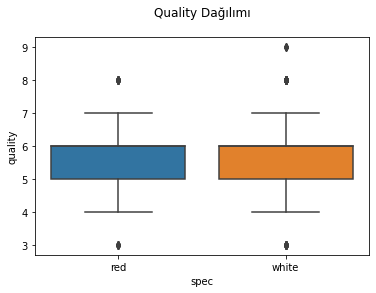

In [ ]:
sns.boxplot(x='spec',y='quality', data=wine_dist)
plt.title("Quality Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

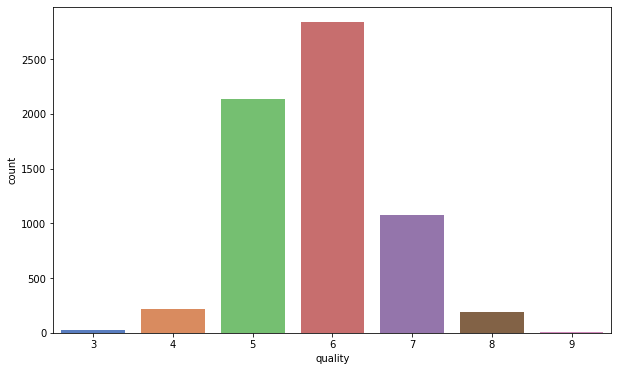

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["quality"], palette="muted")
wine["quality"].value_counts()

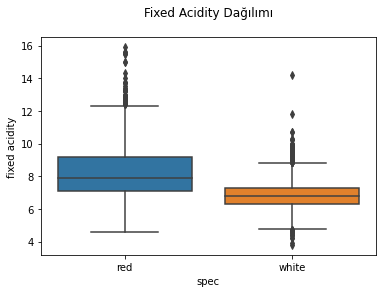

In [ ]:
sns.boxplot(x='spec',y='fixed acidity', data=wine_dist)
plt.title("Fixed Acidity Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


6.8     354
6.6     327
6.4     305
7.0     282
6.9     279
       ... 
13.8      1
3.8       1
13.5      1
13.4      1
12.1      1
Name: fixed acidity, Length: 106, dtype: int64

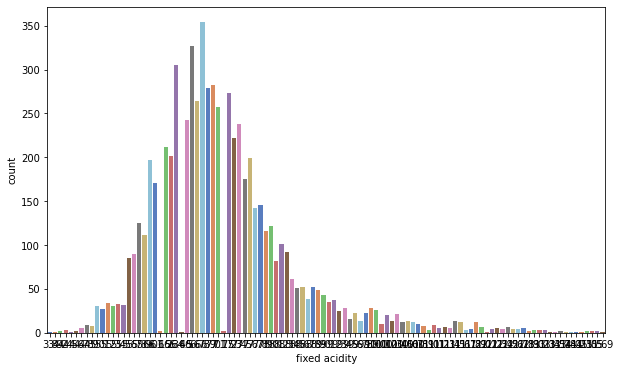

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["fixed acidity"], palette="muted")
wine["fixed acidity"].value_counts()

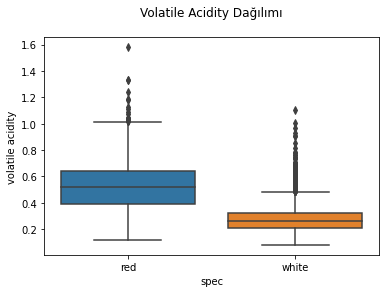

In [ ]:
sns.boxplot(x='spec',y='volatile acidity', data=wine_dist)
plt.title("Volatile Acidity Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
0.355      1
0.825      1
1.130      1
1.025      1
0.405      1
Name: volatile acidity, Length: 187, dtype: int64

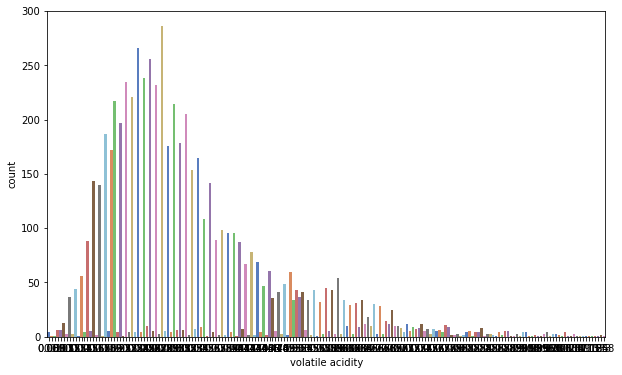

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["volatile acidity"], palette="muted")
wine["volatile acidity"].value_counts()

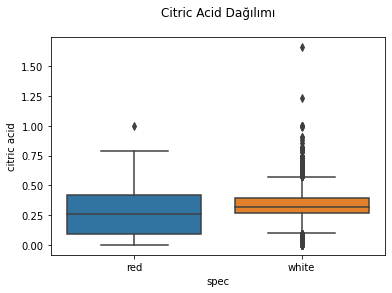

In [ ]:
sns.boxplot(x='spec',y='citric acid', data=wine_dist)
plt.title("Citric Acid Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
0.88      1
1.66      1
0.86      1
0.99      1
1.23      1
Name: citric acid, Length: 89, dtype: int64

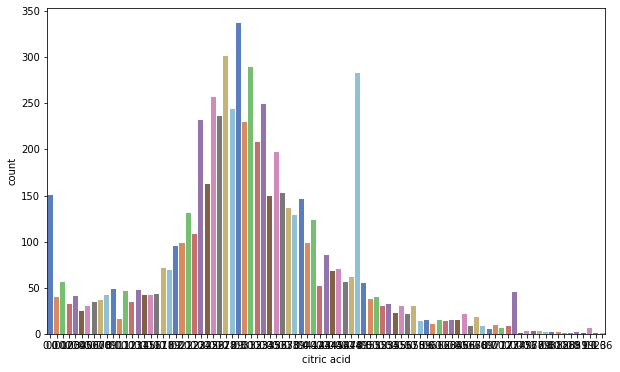

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["citric acid"], palette="muted")
wine["citric acid"].value_counts()

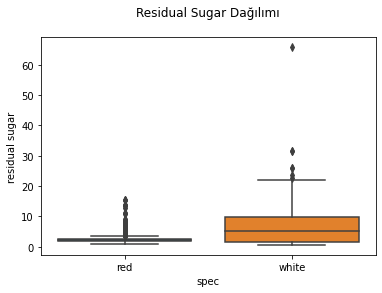

In [ ]:
sns.boxplot(x='spec',y='residual sugar', data=wine_dist)
plt.title("Residual Sugar Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
19.10      1
8.55       1
17.05      1
16.55      1
18.90      1
Name: residual sugar, Length: 316, dtype: int64

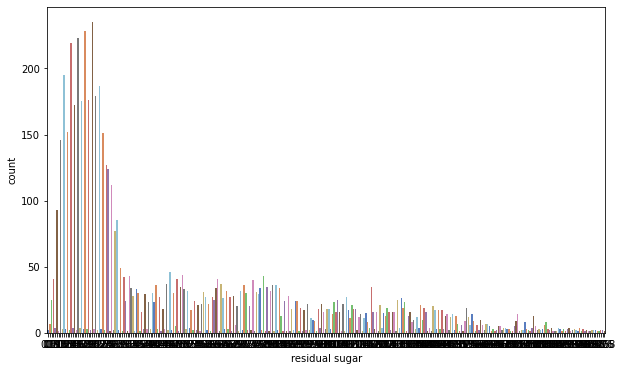

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["residual sugar"], palette="muted")
wine["residual sugar"].value_counts()

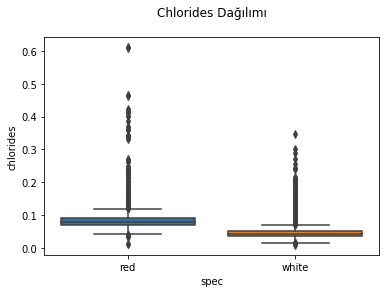

In [ ]:
sns.boxplot(x='spec',y='chlorides', data=wine_dist)
plt.title("Chlorides Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.044    206
0.036    200
0.042    187
0.046    185
0.040    182
        ... 
0.387      1
0.343      1
0.401      1
0.301      1
0.125      1
Name: chlorides, Length: 214, dtype: int64

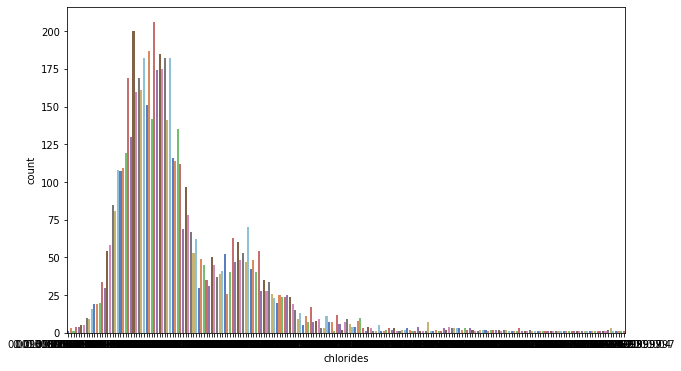

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["chlorides"], palette="muted")
wine["chlorides"].value_counts()

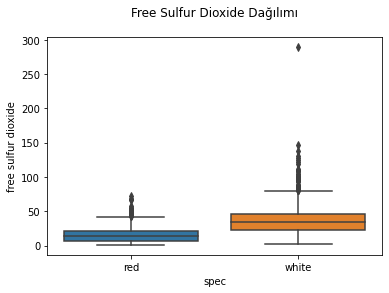

In [ ]:
sns.boxplot(x='spec',y='free sulfur dioxide', data=wine_dist)
plt.title("Free Sulfur Dioxide Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


29.0    183
6.0     170
26.0    161
15.0    157
31.0    152
       ... 
61.5      1
43.5      1
64.5      1
38.5      1
70.5      1
Name: free sulfur dioxide, Length: 135, dtype: int64

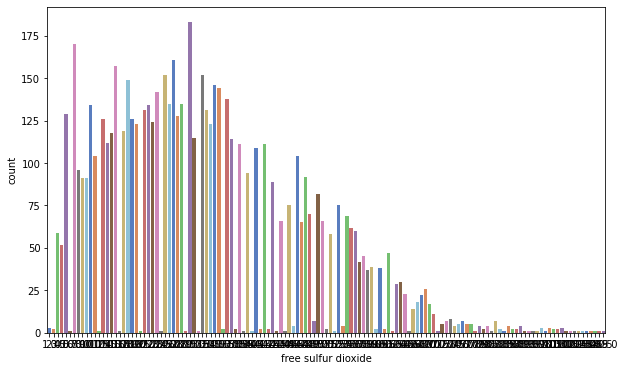

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["free sulfur dioxide"], palette="muted")
wine["free sulfur dioxide"].value_counts()

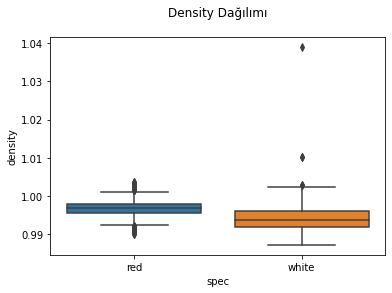

In [ ]:
sns.boxplot(x='spec',y='density', data=wine_dist)
plt.title("Density Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.99720    69
0.99760    69
0.99800    64
0.99200    64
0.99280    63
           ..
0.99631     1
1.00022     1
1.00055     1
0.99065     1
0.99852     1
Name: density, Length: 998, dtype: int64

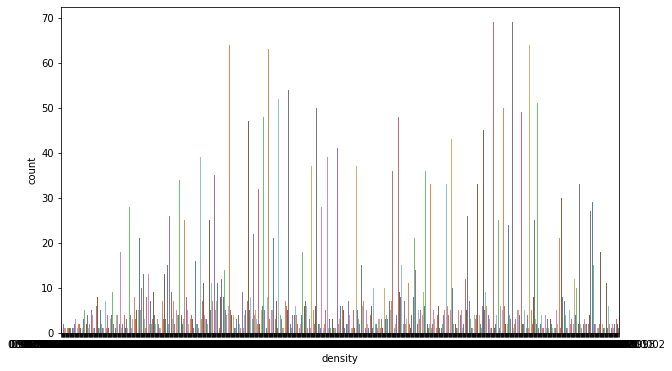

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["density"], palette="muted")
wine["density"].value_counts()

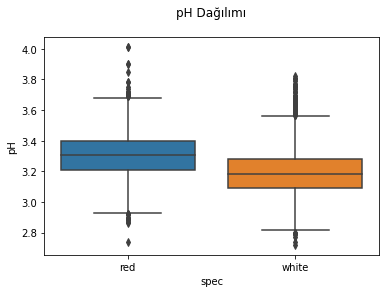

In [ ]:
sns.boxplot(x='spec',y='pH', data=wine_dist)
plt.title("pH Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3.16    200
3.14    193
3.22    185
3.20    176
3.15    170
       ... 
2.82      1
2.72      1
2.77      1
3.85      1
3.81      1
Name: pH, Length: 108, dtype: int64

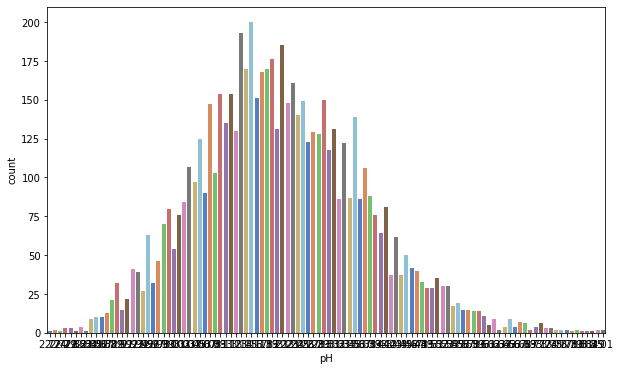

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["pH"], palette="muted")
wine["pH"].value_counts()

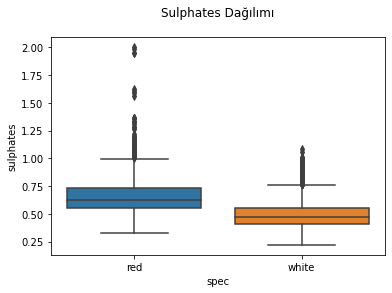

In [ ]:
sns.boxplot(x='spec',y='sulphates', data=wine_dist)
plt.title("Sulphates Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.50    276
0.46    243
0.54    235
0.44    232
0.38    214
       ... 
1.59      1
1.20      1
1.34      1
1.26      1
1.09      1
Name: sulphates, Length: 111, dtype: int64

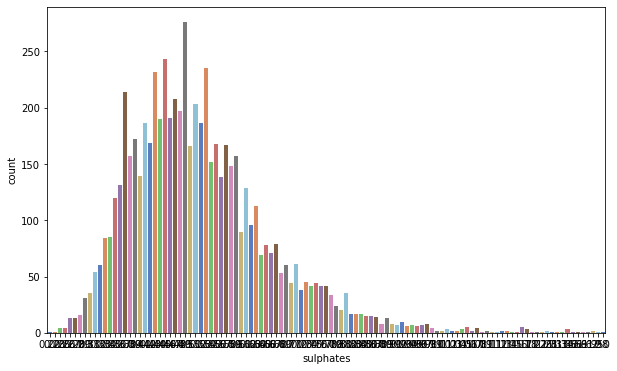

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["sulphates"], palette="muted")
wine["sulphates"].value_counts()

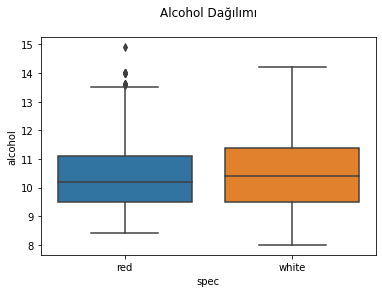

In [ ]:
sns.boxplot(x='spec',y='alcohol', data=wine_dist)
plt.title("Alcohol Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
9.233333       1
12.333333      1
13.133333      1
11.466667      1
11.550000      1
Name: alcohol, Length: 111, dtype: int64

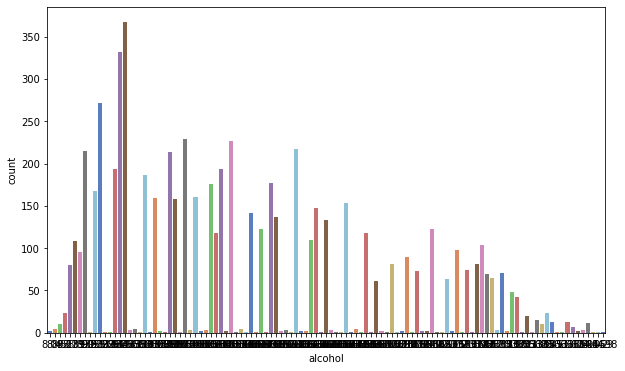

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["alcohol"], palette="muted")
wine["alcohol"].value_counts()

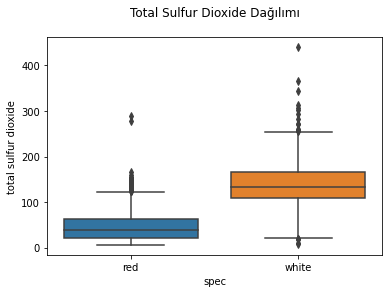

In [ ]:
sns.boxplot(x='spec',y='total sulfur dioxide', data=wine_dist)
plt.title("Total Sulfur Dioxide Dağılımı\n")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


111.0    72
113.0    65
122.0    57
117.0    57
98.0     56
         ..
255.0     1
246.0     1
249.5     1
313.0     1
294.0     1
Name: total sulfur dioxide, Length: 276, dtype: int64

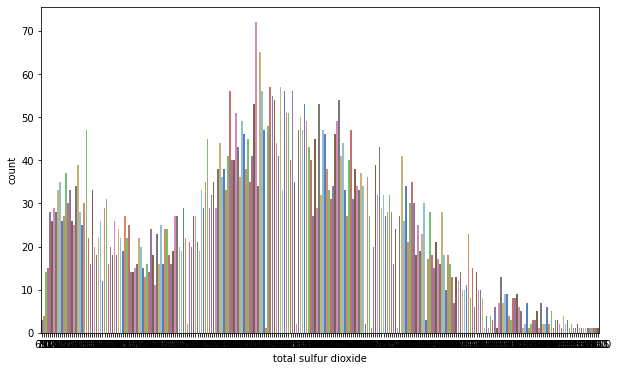

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["total sulfur dioxide"], palette="muted")
wine["total sulfur dioxide"].value_counts()

####   **2-	Correlasyon değerlerini hesaplayarak analiz edelim.**

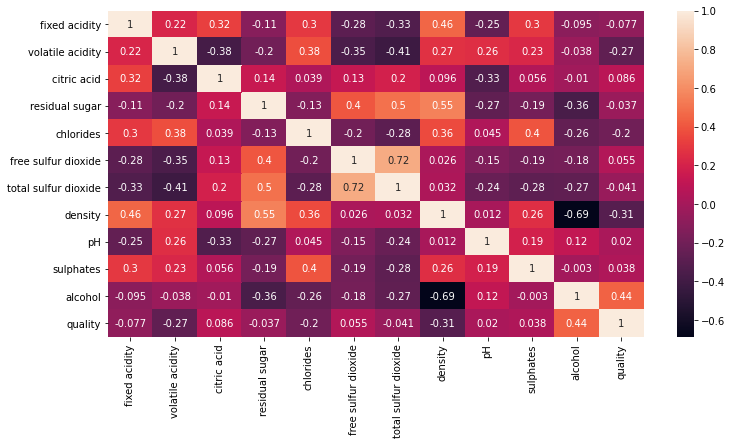

In [ ]:
#wine (red+white)
plt.figure(figsize=(12, 6))
sns.heatmap(wine.corr(), annot=True)

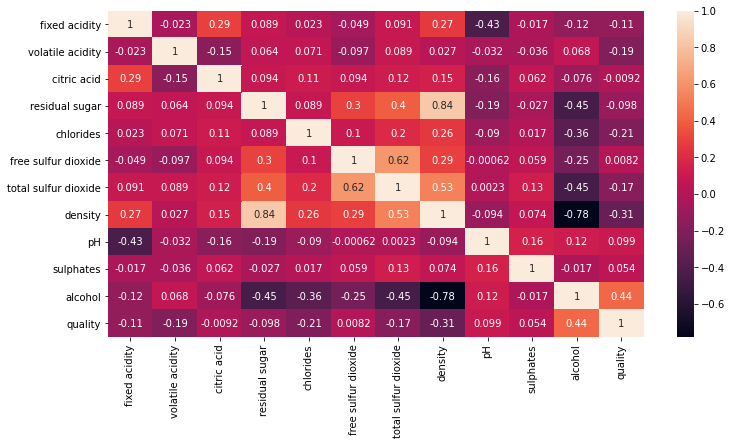

In [ ]:
#white wine
plt.figure(figsize=(12, 6))
sns.heatmap(wine_white.corr(), annot=True)

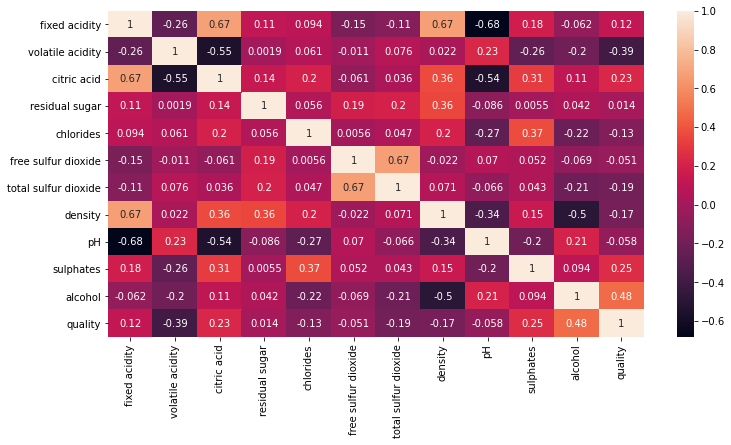

In [ ]:
#red wine
plt.figure(figsize=(12, 6))
sns.heatmap(wine_red.corr(), annot=True)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


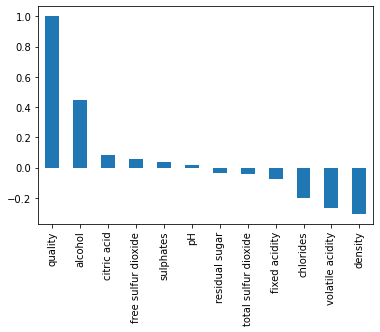

In [ ]:
correlations = wine.corr()['quality'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar' )


fixed acidity           1.000000
density                 0.458910
citric acid             0.324436
sulphates               0.299568
chlorides               0.298195
volatile acidity        0.219008
quality                -0.076743
alcohol                -0.095452
residual sugar         -0.111981
pH                     -0.252700
free sulfur dioxide    -0.282735
total sulfur dioxide   -0.329054
Name: fixed acidity, dtype: float64


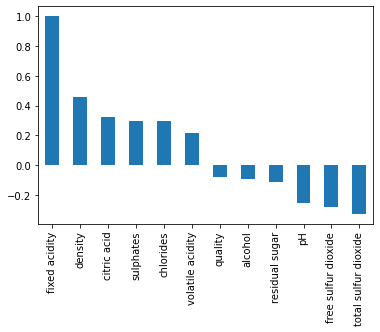

In [ ]:
correlations = wine.corr()['fixed acidity'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

volatile acidity        1.000000
chlorides               0.377124
density                 0.271296
pH                      0.261454
sulphates               0.225984
fixed acidity           0.219008
alcohol                -0.037640
residual sugar         -0.196011
quality                -0.265699
free sulfur dioxide    -0.352557
citric acid            -0.377981
total sulfur dioxide   -0.414476
Name: volatile acidity, dtype: float64


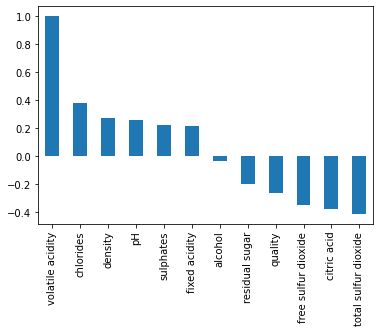

In [ ]:
correlations = wine.corr()['volatile acidity'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

citric acid             1.000000
fixed acidity           0.324436
total sulfur dioxide    0.195242
residual sugar          0.142451
free sulfur dioxide     0.133126
density                 0.096154
quality                 0.085532
sulphates               0.056197
chlorides               0.038998
alcohol                -0.010493
pH                     -0.329808
volatile acidity       -0.377981
Name: citric acid, dtype: float64


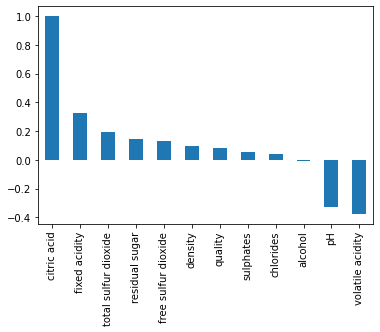

In [ ]:
correlations = wine.corr()['citric acid'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

residual sugar          1.000000
density                 0.552517
total sulfur dioxide    0.495482
free sulfur dioxide     0.402871
citric acid             0.142451
quality                -0.036980
fixed acidity          -0.111981
chlorides              -0.128940
sulphates              -0.185927
volatile acidity       -0.196011
pH                     -0.267320
alcohol                -0.359415
Name: residual sugar, dtype: float64


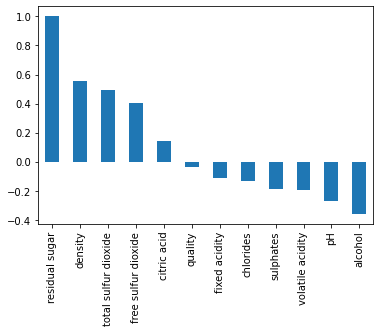

In [ ]:
correlations = wine.corr()['residual sugar'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

chlorides               1.000000
sulphates               0.395593
volatile acidity        0.377124
density                 0.362615
fixed acidity           0.298195
pH                      0.044708
citric acid             0.038998
residual sugar         -0.128940
free sulfur dioxide    -0.195045
quality                -0.200666
alcohol                -0.256916
total sulfur dioxide   -0.279630
Name: chlorides, dtype: float64


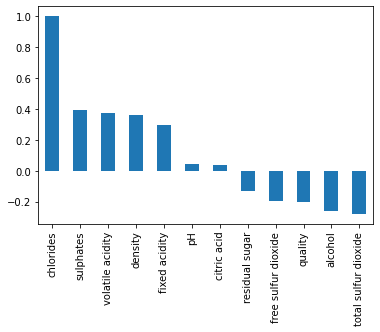

In [ ]:
correlations = wine.corr()['chlorides'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

free sulfur dioxide     1.000000
total sulfur dioxide    0.720934
residual sugar          0.402871
citric acid             0.133126
quality                 0.055463
density                 0.025717
pH                     -0.145854
alcohol                -0.179838
sulphates              -0.188457
chlorides              -0.195045
fixed acidity          -0.282735
volatile acidity       -0.352557
Name: free sulfur dioxide, dtype: float64


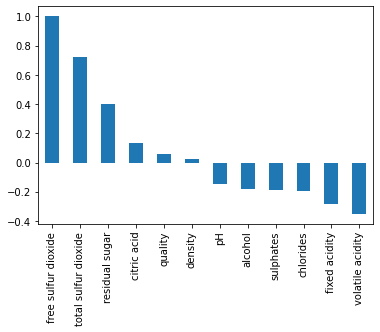

In [ ]:
correlations = wine.corr()['free sulfur dioxide'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

total sulfur dioxide    1.000000
free sulfur dioxide     0.720934
residual sugar          0.495482
citric acid             0.195242
density                 0.032395
quality                -0.041385
pH                     -0.238413
alcohol                -0.265740
sulphates              -0.275727
chlorides              -0.279630
fixed acidity          -0.329054
volatile acidity       -0.414476
Name: total sulfur dioxide, dtype: float64


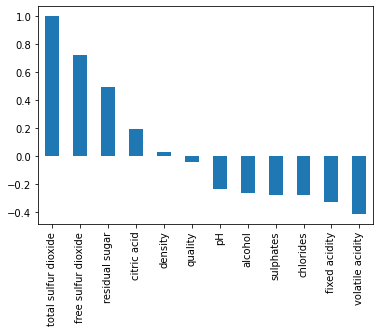

In [ ]:
correlations = wine.corr()['total sulfur dioxide'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

density                 1.000000
residual sugar          0.552517
fixed acidity           0.458910
chlorides               0.362615
volatile acidity        0.271296
sulphates               0.259478
citric acid             0.096154
total sulfur dioxide    0.032395
free sulfur dioxide     0.025717
pH                      0.011686
quality                -0.305858
alcohol                -0.686745
Name: density, dtype: float64


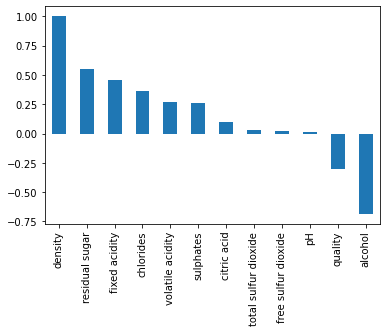

In [ ]:
correlations = wine.corr()['density'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

pH                      1.000000
volatile acidity        0.261454
sulphates               0.192123
alcohol                 0.121248
chlorides               0.044708
quality                 0.019506
density                 0.011686
free sulfur dioxide    -0.145854
total sulfur dioxide   -0.238413
fixed acidity          -0.252700
residual sugar         -0.267320
citric acid            -0.329808
Name: pH, dtype: float64


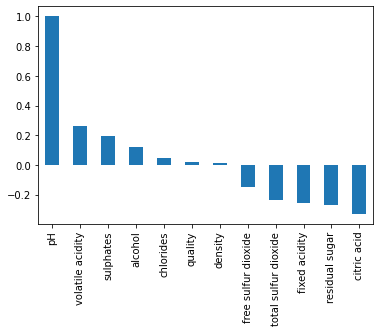

In [ ]:
correlations = wine.corr()['pH'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

sulphates               1.000000
chlorides               0.395593
fixed acidity           0.299568
density                 0.259478
volatile acidity        0.225984
pH                      0.192123
citric acid             0.056197
quality                 0.038485
alcohol                -0.003029
residual sugar         -0.185927
free sulfur dioxide    -0.188457
total sulfur dioxide   -0.275727
Name: sulphates, dtype: float64


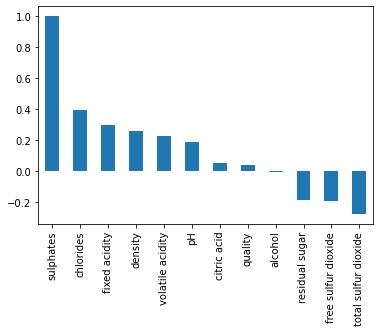

In [ ]:
correlations = wine.corr()['sulphates'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

alcohol                 1.000000
quality                 0.444319
pH                      0.121248
sulphates              -0.003029
citric acid            -0.010493
volatile acidity       -0.037640
fixed acidity          -0.095452
free sulfur dioxide    -0.179838
chlorides              -0.256916
total sulfur dioxide   -0.265740
residual sugar         -0.359415
density                -0.686745
Name: alcohol, dtype: float64


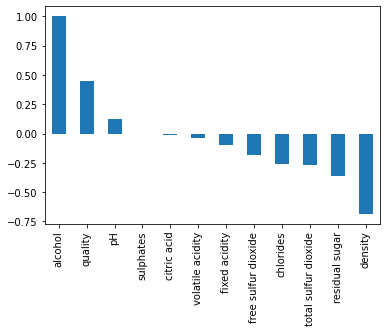

In [ ]:
correlations = wine.corr()['alcohol'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

#### **3-	Her özniteliğin Fisher Uzaklığını (sınıflar arası) hesaplarak analiz edelim.**

In [ ]:
def findFisherDistance(X, Y):
  fisherDistance=[]
  for i in X.columns:
    X_avarag=X[i].mean()
    Y_avarag=Y[i].mean()
    X_var=X[i].var()
    Y_var=Y[i].var()
    fisherDistance.append(abs(X_avarag- Y_avarag)/(X_var+Y_var))
  return fisherDistance


dist=findFisherDistance(wine_red_without_quality, wine_white_without_quality)
count=0
print("## Fisher Distance of Wine Dataset Without Quality ##")
print("")
for i in wine_red_without_quality.columns:
  print(i+"   ->   "+str(dist[count]))
  count+=1
  if count==11:
    break


## Fisher Distance of Wine Dataset Without Quality ##

fixed acidity   ->   0.3913016897848707
volatile acidity   ->   5.911133411593597
citric acid   ->   1.201976785180223
residual sugar   ->   0.13901477990735647
chlorides   ->   15.485441616427764
free sulfur dioxide   ->   0.04874650055503574
total sulfur dioxide   ->   0.03181678941528218
density   ->   217.4128348961177
pH   ->   2.6341367982039885
sulphates   ->   4.030477968164935
alcohol   ->   0.03444580051326023


#### **4-	PCA ile veri setini dönüştürüp her Eigen vektöre üzerindeki izdüşümünü bir öznitelik olarak değerlendirip ve her özniteliğin Fisher Uzaklığını hesaplayalım ve 3. Maddede elde edilen Fisher Uzaklıkları ile kıyaslayalım. Eigen değerleri (Eigen Value) ile hesaplanan Fisher uzaklıkları arasında bir ilişki olup olmadığını yorumlayalım.**

In [ ]:
#red wine
pca = PCA()
results = pca.fit(wine_red_without_quality)
wrwq = results.transform(wine_red_without_quality)

#white wine
pca = PCA()
results = pca.fit(wine_white_without_quality)
wwwq = results.transform(wine_white_without_quality)

columns = ['pca_%i' % i for i in range(1 , 12)]
df_wwwq = DataFrame(wwwq, columns=columns, index=wine_white_without_quality.index)

df_wrwq = DataFrame(wrwq, columns=columns, index=wine_red_without_quality.index)


pca_fisher_distance=findFisherDistance(df_wrwq,df_wwwq)

count=0
print("## Fisher Distance of PCA Dataset Without Quality ##")
print("")
for i in df_wrwq.columns:
  print(i+"   ->   "+str(pca_fisher_distance[count]))
  count+=1


## Fisher Distance of PCA Dataset Without Quality ##

pca_1   ->   1.453999537194533e-18
pca_2   ->   4.9708102197547614e-18
pca_3   ->   6.038511800218694e-17
pca_4   ->   4.3791574873105424e-17
pca_5   ->   5.033104527383775e-16
pca_6   ->   3.5232081195687544e-15
pca_7   ->   3.335263816112997e-15
pca_8   ->   1.7267193812338727e-14
pca_9   ->   7.626613798785756e-15
pca_10   ->   2.935643958775852e-14
pca_11   ->   6.400908394092842e-11


In [ ]:
#red wine
pca = PCA()
results = pca.fit(wine_red_without_quality)
wrwq = results.transform(wine_red_without_quality)

#white wine
pca = PCA()
results = pca.fit(wine_white_without_quality)
wwwq = results.transform(wine_white_without_quality)

columns = ['pca_%i' % i for i in range(1 , 12)]
df_wwwq = DataFrame(wwwq, columns=columns, index=wine_white_without_quality.index)

df_wrwq = DataFrame(wrwq, columns=columns, index=wine_red_without_quality.index)


pca_fisher_distance=findFisherDistance(df_wrwq,df_wwwq)

count=0
print("## Fisher Distance of PCA Dataset Without Quality ##")
print("")
for i in df_wrwq.columns:
  print(i+"   ->   "+str(pca_fisher_distance[count]))
  count+=1


## Fisher Distance of PCA Dataset Without Quality ##

pca_1   ->   1.453999537194533e-18
pca_2   ->   4.9708102197547614e-18
pca_3   ->   6.038511800218694e-17
pca_4   ->   4.3791574873105424e-17
pca_5   ->   5.033104527383775e-16
pca_6   ->   3.5232081195687544e-15
pca_7   ->   3.335263816112997e-15
pca_8   ->   1.7267193812338727e-14
pca_9   ->   7.626613798785756e-15
pca_10   ->   2.935643958775852e-14
pca_11   ->   6.400908394092842e-11


([<matplotlib.axis.XTick at 0x7f108ad52d30>,
 <a list of 12 Text major ticklabel objects>)

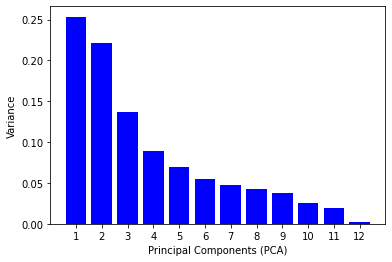

In [ ]:
stdsc_wine = StandardScaler().fit_transform(wine)
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(stdsc_wine)
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Components (PCA)')
plt.ylabel('Variance')
plt.xticks(PC)


([<matplotlib.axis.XTick at 0x7f1096e26a20>,
 <a list of 12 Text major ticklabel objects>)

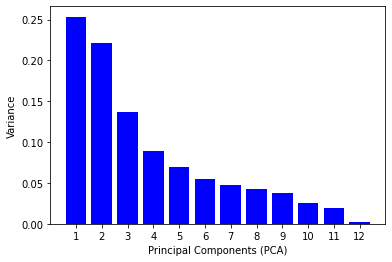

([<matplotlib.axis.XTick at 0x7f10977dc320>,
 <a list of 11 Text major ticklabel objects>)

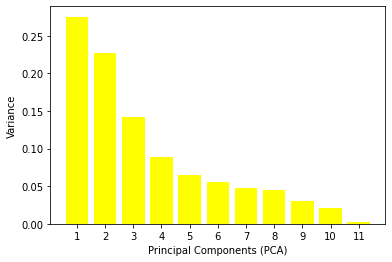

In [ ]:
stdsc_wine = StandardScaler().fit_transform(wine_without_quality)
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(stdsc_wine)
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='yellow')
plt.xlabel('Principal Components (PCA)')
plt.ylabel('Variance')
plt.xticks(PC)


####  **5-	Verinin en önemli iki Eigen vektör üzerindeki izdüşümünü scatter plot ile çizelim. Scatter plot işleminde her sınıfa (red/white) ait özneği farklı renkte gösterilmiştir.**

In [ ]:
df_wrwq['wine_type']='red'
df_wwwq['wine_type']='white'
frames = [df_wrwq,df_wwwq]
PCA_dataset_without_quality = pd.concat(frames)

In [ ]:
PCA_dataset_without_quality.columns

Index(['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8',
       'pca_9', 'pca_10', 'pca_11', 'wine_type'],
      dtype='object')

white wine ve red wine PCA sonrası karşılaştırması 

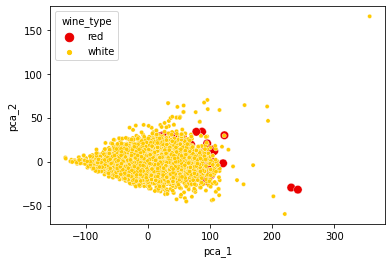

In [ ]:
sns.scatterplot(data = PCA_dataset_without_quality, x = 'pca_1',y = 'pca_2' , hue='wine_type',s = 60 ,palette= 'hot',size='wine_type')

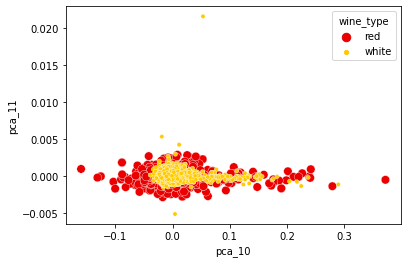

In [ ]:
sns.scatterplot(data = PCA_dataset_without_quality, x = 'pca_10',y = 'pca_11' , hue='wine_type',s = 60 ,palette= 'hot',size='wine_type')

In [ ]:
sc = StandardScaler()
wine = sc.fit_transform(wine)

# wine
pca = PCA()
results = pca.fit(wine)
winePCA = results.transform(wine)

columns = ['pca_%i' % i for i in range(12)]
df_winePCA = DataFrame(winePCA, columns=columns)
df_winePCA.columns

Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       'pca_8', 'pca_9', 'pca_10', 'pca_11'],
      dtype='object')

Wine dataseitne PCA uyguladıktan sonra en önemli iki vektör

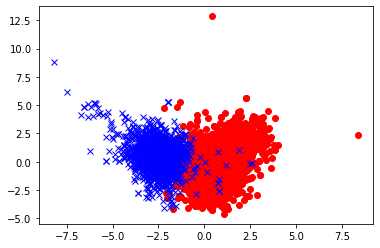

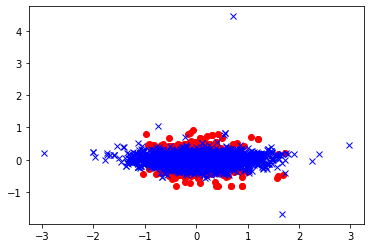

In [ ]:
whitevalues10= df_winePCA["pca_0"].tolist()[:1599]
redvalues10 = df_winePCA["pca_0"].tolist()[-4898:]
whitevalues9 = df_winePCA["pca_1"].tolist()[:1599]
redvalues9 = df_winePCA["pca_1"].tolist()[-4898:]
plt.plot(redvalues10, redvalues9,'o' , color = 'red')
plt.plot(whitevalues10, whitevalues9,  'x',color = 'blue')
plt.show()

redvalues10 = df_winePCA["pca_10"].tolist()[:1599]
whitevalues10 = df_winePCA["pca_10"].tolist()[-4898:]
redvalues9 = df_winePCA["pca_11"].tolist()[:1599]
whitevalues9 = df_winePCA["pca_11"].tolist()[-4898:]
plt.plot(redvalues10, redvalues9,'o' , color = 'red')
plt.plot(whitevalues10, whitevalues9,  'x',color = 'blue')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 5.166933     8
-8.998628     8
-23.849774    7
-9.526325     7
-8.581269     6
             ..
 16.809302    1
 10.078884    1
-3.625796     1
 24.577666    1
 3.057314     1
Name: pca_1, Length: 5318, dtype: int64

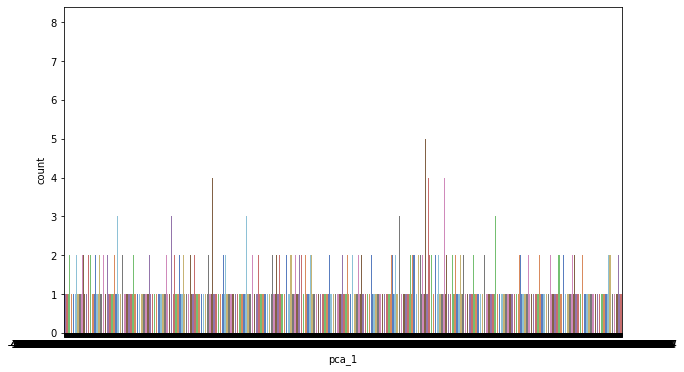

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df_winePCA["pca_1"], palette="muted")
df_winePCA["pca_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 32.367545     8
 41.853715     8
 51.373796     7
 51.718293     7
 77.435771     6
              ..
-18.789461     1
 18.372966     1
 38.844789     1
-56.485410     1
-106.651764    1
Name: pca_0, Length: 5318, dtype: int64

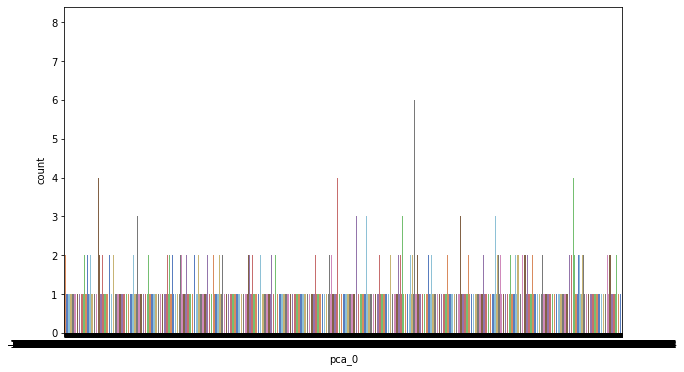

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df_winePCA["pca_0"], palette="muted")
df_winePCA["pca_0"].value_counts()

Wine datasetine PCA uyguladıktan sonra en önemsiz iki vektör

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.013004    8
 0.013260    8
 0.016290    7
 0.011459    7
 0.005277    6
            ..
 0.009463    1
 0.011700    1
 0.005018    1
-0.025220    1
-0.015567    1
Name: pca_10, Length: 5318, dtype: int64

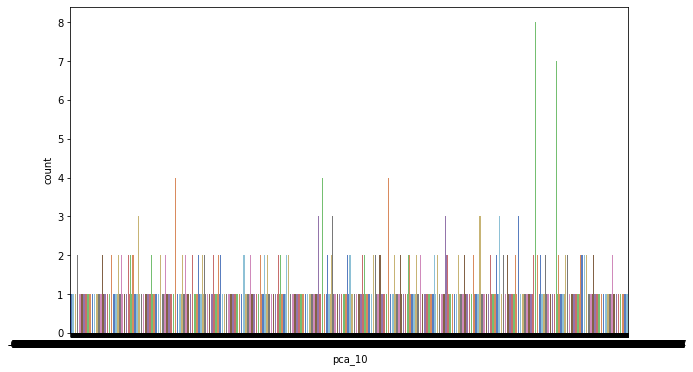

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df_winePCA["pca_10"], palette="muted")
df_winePCA["pca_10"].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.000489    8
 0.000426    8
 0.000661    7
 0.001046    7
 0.000047    6
            ..
 0.000144    1
 0.000261    1
-0.000243    1
 0.001477    1
-0.001208    1
Name: pca_11, Length: 5318, dtype: int64

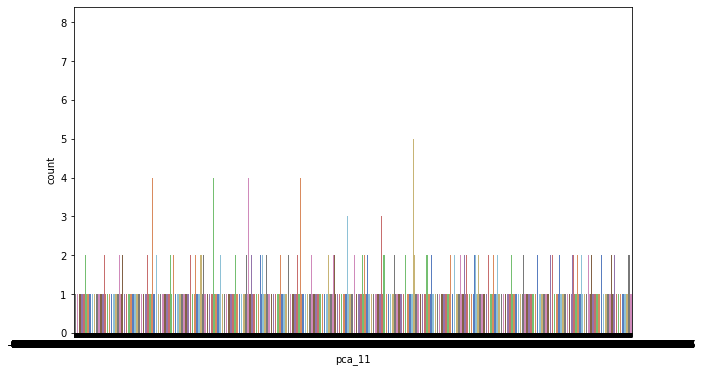

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df_winePCA["pca_11"], palette="muted")
df_winePCA["pca_11"].value_counts()

#### **6-	Veri setini K-Means, SOM ve DBSCAN algoritması ile gruplayalım.**

In [ ]:
pca = PCA()
results = pca.fit(wine_without_quality)
wine_without_qualityPCA = results.transform(wine_without_quality)

columns = ['pca_%i' % i for i in range(11)]

df_wine_without_qualityPCA = DataFrame(wine_without_qualityPCA, columns=columns, index=wine_without_quality.index)

df_wine_without_qualityPCA.columns

Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       'pca_8', 'pca_9', 'pca_10'],
      dtype='object')

**K-Means**

[1 1 1 ... 0 0 0]


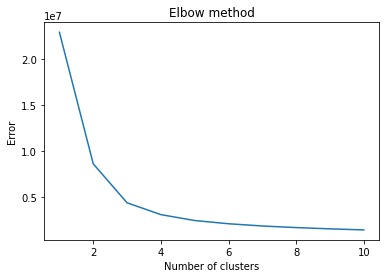

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300, n_init=12, random_state=0)
kmeans.fit(df_wine_without_qualityPCA)
y_kmeans5 = kmeans.fit_predict(df_wine_without_qualityPCA)
print(y_kmeans5)

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_wine_without_qualityPCA)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
frames = [wine_red, wine_white]
wine = pd.concat(frames)
max_quality=wine['quality'].max

column = wine["quality"]
max_value = column.max()

In [ ]:
model = KMeans(n_clusters=max_value)
model.fit(df_wine_without_qualityPCA.iloc[:,:2]) # iki önemli eigen vektörü

labels = model.predict(df_wine_without_qualityPCA.iloc[:,:2])

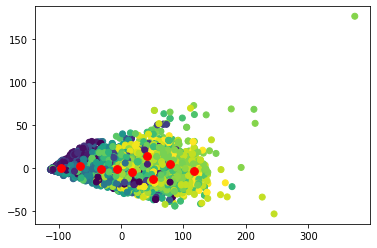

In [ ]:
plt.scatter(df_wine_without_qualityPCA['pca_0'], df_wine_without_qualityPCA['pca_1'], c=labels)
centers = model.cluster_centers_
plt.scatter(centers[:,0] , centers[:,1] , s = 60, color = 'red') 
plt.show()

**DBScan**

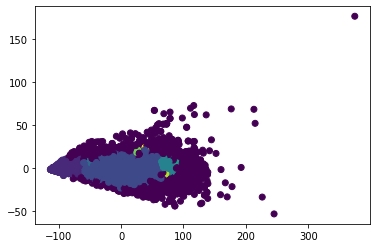

In [ ]:
clustering = DBSCAN(eps=3, min_samples=19).fit(df_wine_without_qualityPCA.iloc[:,:2])
clustering.labels_
plt.scatter(df_wine_without_qualityPCA['pca_0'], df_wine_without_qualityPCA['pca_1'], c=clustering.labels_)

**SOM**

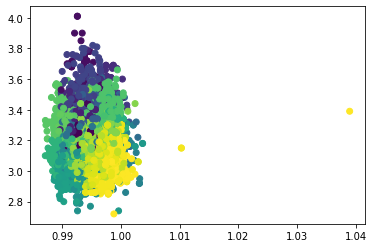

In [ ]:
som = SOM(n_columns=11, random_state=1)
labels = som.fit_predict(wine_without_quality)
plt.scatter(wine_without_quality['density'], wine_without_quality['pH'],c= labels)